In [1]:
import numpy as np
import pandas as pd
import glob

import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import skmob
from tqdm import tqdm

In [2]:
# # DATA FOLDER
# from google.colab import drive
# drive.mount("/content/gdrive")
# DATA_FOLDER="/content/gdrive/MyDrive/Oxford_class/Project_columbia/"
# # DATA FOLDER
# DATA_FOLDER = 'C:/Users/Mrlic/Documents/Oxford/final_project/'
DATA_FOLDER='/home/cli/MDA/oxford/final_project/'

In [3]:

comunas = pd.read_csv(DATA_FOLDER + "comunas.csv")
# comunas_commutes info
comunas_commutes = pd.read_csv(DATA_FOLDER + "comunas_commutes.csv",header=None, names=["src","dst","weight"])
# comunas_firms
comunas_firms = pd.read_csv(DATA_FOLDER + "comunas_firms.csv")


comunas_gmaps = pd.read_csv(DATA_FOLDER + "comunas_gmaps.csv")

comunas_pop = pd.read_csv(DATA_FOLDER + "comunas_pop.csv")

comunas_stratum = pd.read_csv(DATA_FOLDER + "comunas_stratum.csv")
import chardet

rawdata = open(DATA_FOLDER + "medellin_metro.csv", 'rb').read()
result = chardet.detect(rawdata)
char_encoding = result['encoding']

medellin_metro = pd.read_csv(DATA_FOLDER + "medellin_metro.csv", encoding=char_encoding)

In [4]:
medellin_metro

stop line                                comuna_name  \
0                 Bello    A  Bello-Comuna 03                         '   
1          Palos verdes   L1  Manrique                                '   
2                Gardel   L1  Manrique                                '   
3              Manrique   L1  Manrique                                '   
4        Las Esmeraldas   L1  Manrique                                '   
..                  ...  ...                                        ...   
89              Oriente  T-A  Villa Hermosa                           '   
90                 Arv’    L  Corregimiento Santa Elena               '   
91              Popular    K  Popular                                 '   
92  Santo Domingo Savio    K  Popular                                 '   
93  Santo Domingo Savio    L  Popular                                 '   

    comuna_index  macrozona municipality  muni_index  Lattitude  Longitude  \
0              8          8        bello           3   6.337778 -75.544444   
1              9         13     medellin           1   6.330278 -75.553611   
2              9         13     medellin           1   6.315833 -75.555417   
3              9         13     medellin           1   6.300278 -75.558472   
4              9         13     medellin           1   6.290597 -75.564258   
..           ...        ...          ...         ...        ...        ...   
89            61         20     medellin           1   6.268324 -75.554901   
90            64         47     medellin           1   6.273219 -75.554192   
91            65         31     medellin           1   6.278936 -75.552797   
92            65         31     medellin           1   6.283007 -75.552707   
93            65         31     medellin           1   6.286213 -75.555894   

                 type transfer transfer2  
0               Metro      NaN       NaN  
1   Bus rapid transit       L1       NaN  
2   Bus rapid transit       L1       NaN  
3   Bus rapid transit       L1       NaN  
4   Bus rapid transit       L1       NaN  
..                ...      ...       ...  
89            Tramway        H       NaN  
90              Cable      NaN       NaN  
91              Cable      NaN       NaN  
92              Cable        L       NaN  
93              Cable        K       NaN  

[94 rows x 12 columns]

In [5]:
comunas

comuna name  comuna_index  \
0        Itagui-Comuna 06                        '              1   
1         Itagui-Comuna 05                        '             2   
2        Urbana La Estrella                      '              3   
3         Bello-Comuna 06                         '             4   
4         Bello-Comuna 05                         '             5   
..                                              ...           ...   
61      Rural Girardota                          '             62   
62        Urbana Girardota                        '            63   
63       Corregimiento Santa Elena               '             64   
64        Popular                                 '            65   
65        Itagui-Comuna 03                        '            66   

     municipality  muni_index  comuna longitude  comuna latitude  \
0        'Itagui'           8         -75.61493         6.176629   
1        'Itagui'           8         -75.60698         6.180733   
2   'La Estrella'           9         -75.63781         6.142994   
3         'Bello'           3         -75.56693         6.352998   
4         'Bello'           3         -75.56992         6.341258   
..            ...         ...               ...              ...   
61    'Girardota'           7         -75.44836         6.380775   
62    'Girardota'           7         -75.44330         6.380888   
63     'Medellin'           1         -75.51665         6.234823   
64     'Medellin'           1         -75.54420         6.293636   
65       'Itagui'           8         -75.63346         6.169564   

    Macrozona _shapefile  
0                      1  
1                      2  
2                     25  
3                      6  
4                      5  
..                   ...  
61                    41  
62                    27  
63                    47  
64                    31  
65                     4  

[66 rows x 7 columns]

In [6]:
comunas_commutes

src  dst  weight
0       1    1     271
1       2    1      40
2       3    1      56
3       4    1      42
4       7    1      45
...   ...  ...     ...
3342   55   66       2
3343   56   66       1
3344   59   66       2
3345   64   66      10
3346   66   66      60

[3347 rows x 3 columns]

In [7]:
# !pip install scikit-network

In [8]:
comunas_firms

comuna_index  muni_index  num_firms
0              1           8        494
1              2           8        949
2              3           9       1946
3              4           3        733
4              5           3       1459
..           ...         ...        ...
61            62           7        151
62            63           7        992
63            64           1         37
64            65           1        685
65            66           8       1661

[66 rows x 3 columns]

In [9]:
comunas_gmaps

travel_time_m     mode  origin  destination
0           0.000000  driving       1            1
1           7.150000  driving       1            2
2          17.933333  driving       1            3
3          46.266667  driving       1            4
4          43.550000  driving       1            5
...              ...      ...     ...          ...
13063     453.366667  walking      66           62
13064     459.766667  walking      66           63
13065     283.316667  walking      66           64
13066     261.116667  walking      66           65
13067       0.000000  walking      66           66

[13068 rows x 4 columns]

In [10]:
comunas_gps=comunas[['comuna_index','comuna longitude','comuna latitude','Macrozona _shapefile']]

In [11]:
comunas_gps

comuna_index  comuna longitude  comuna latitude  Macrozona _shapefile
0              1         -75.61493         6.176629                     1
1              2         -75.60698         6.180733                     2
2              3         -75.63781         6.142994                    25
3              4         -75.56693         6.352998                     6
4              5         -75.56992         6.341258                     5
..           ...               ...              ...                   ...
61            62         -75.44836         6.380775                    41
62            63         -75.44330         6.380888                    27
63            64         -75.51665         6.234823                    47
64            65         -75.54420         6.293636                    31
65            66         -75.63346         6.169564                     4

[66 rows x 4 columns]

In [12]:

# df_total = .merge(, on=['comuna_index'])


merged_df = comunas_gmaps.merge(comunas_gps, left_on=['origin'], right_on=['comuna_index'])

In [13]:
merged_df

travel_time_m     mode  origin  destination  comuna_index  \
0           0.000000  driving       1            1             1   
1           7.150000  driving       1            2             1   
2          17.933333  driving       1            3             1   
3          46.266667  driving       1            4             1   
4          43.550000  driving       1            5             1   
...              ...      ...     ...          ...           ...   
13063     453.366667  walking      66           62            66   
13064     459.766667  walking      66           63            66   
13065     283.316667  walking      66           64            66   
13066     261.116667  walking      66           65            66   
13067       0.000000  walking      66           66            66   

       comuna longitude  comuna latitude  Macrozona _shapefile  
0             -75.61493         6.176629                     1  
1             -75.61493         6.176629                     1  
2             -75.61493         6.176629                     1  
3             -75.61493         6.176629                     1  
4             -75.61493         6.176629                     1  
...                 ...              ...                   ...  
13063         -75.63346         6.169564                     4  
13064         -75.63346         6.169564                     4  
13065         -75.63346         6.169564                     4  
13066         -75.63346         6.169564                     4  
13067         -75.63346         6.169564                     4  

[13068 rows x 8 columns]

In [14]:
merged_df2 = merged_df.merge(comunas_gps, left_on=['destination'], right_on=['comuna_index'])

In [15]:
merged_df2

travel_time_m     mode  origin  destination  comuna_index_x  \
0           0.000000  driving       1            1               1   
1           0.000000  transit       1            1               1   
2           0.000000  walking       1            1               1   
3           8.900000  driving       2            1               2   
4          18.933333  transit       2            1               2   
...              ...      ...     ...          ...             ...   
13063            inf  transit      65           66              65   
13064     259.566667  walking      65           66              65   
13065       0.000000  driving      66           66              66   
13066       0.000000  transit      66           66              66   
13067       0.000000  walking      66           66              66   

       comuna longitude_x  comuna latitude_x  Macrozona _shapefile_x  \
0               -75.61493           6.176629                       1   
1               -75.61493           6.176629                       1   
2               -75.61493           6.176629                       1   
3               -75.60698           6.180733                       2   
4               -75.60698           6.180733                       2   
...                   ...                ...                     ...   
13063           -75.54420           6.293636                      31   
13064           -75.54420           6.293636                      31   
13065           -75.63346           6.169564                       4   
13066           -75.63346           6.169564                       4   
13067           -75.63346           6.169564                       4   

       comuna_index_y  comuna longitude_y  comuna latitude_y  \
0                   1           -75.61493           6.176629   
1                   1           -75.61493           6.176629   
2                   1           -75.61493           6.176629   
3                   1           -75.61493           6.176629   
4                   1           -75.61493           6.176629   
...               ...                 ...                ...   
13063              66           -75.63346           6.169564   
13064              66           -75.63346           6.169564   
13065              66           -75.63346           6.169564   
13066              66           -75.63346           6.169564   
13067              66           -75.63346           6.169564   

       Macrozona _shapefile_y  
0                           1  
1                           1  
2                           1  
3                           1  
4                           1  
...                       ...  
13063                       4  
13064                       4  
13065                       4  
13066                       4  
13067                       4  

[13068 rows x 12 columns]

In [16]:
merged_df2['src_point'] = merged_df2.apply(lambda row: (row['comuna latitude_x'], row['comuna longitude_x']), axis=1)

In [17]:
merged_df2['dst_point'] = merged_df2.apply(lambda row: (row['comuna latitude_y'], row['comuna longitude_y']), axis=1)

In [18]:
merged_df2

travel_time_m     mode  origin  destination  comuna_index_x  \
0           0.000000  driving       1            1               1   
1           0.000000  transit       1            1               1   
2           0.000000  walking       1            1               1   
3           8.900000  driving       2            1               2   
4          18.933333  transit       2            1               2   
...              ...      ...     ...          ...             ...   
13063            inf  transit      65           66              65   
13064     259.566667  walking      65           66              65   
13065       0.000000  driving      66           66              66   
13066       0.000000  transit      66           66              66   
13067       0.000000  walking      66           66              66   

       comuna longitude_x  comuna latitude_x  Macrozona _shapefile_x  \
0               -75.61493           6.176629                       1   
1               -75.61493           6.176629                       1   
2               -75.61493           6.176629                       1   
3               -75.60698           6.180733                       2   
4               -75.60698           6.180733                       2   
...                   ...                ...                     ...   
13063           -75.54420           6.293636                      31   
13064           -75.54420           6.293636                      31   
13065           -75.63346           6.169564                       4   
13066           -75.63346           6.169564                       4   
13067           -75.63346           6.169564                       4   

       comuna_index_y  comuna longitude_y  comuna latitude_y  \
0                   1           -75.61493           6.176629   
1                   1           -75.61493           6.176629   
2                   1           -75.61493           6.176629   
3                   1           -75.61493           6.176629   
4                   1           -75.61493           6.176629   
...               ...                 ...                ...   
13063              66           -75.63346           6.169564   
13064              66           -75.63346           6.169564   
13065              66           -75.63346           6.169564   
13066              66           -75.63346           6.169564   
13067              66           -75.63346           6.169564   

       Macrozona _shapefile_y              src_point              dst_point  
0                           1  (6.176629, -75.61493)  (6.176629, -75.61493)  
1                           1  (6.176629, -75.61493)  (6.176629, -75.61493)  
2                           1  (6.176629, -75.61493)  (6.176629, -75.61493)  
3                           1  (6.180733, -75.60698)  (6.176629, -75.61493)  
4                           1  (6.180733, -75.60698)  (6.176629, -75.61493)  
...                       ...                    ...                    ...  
13063                       4   (6.293636, -75.5442)  (6.169564, -75.63346)  
13064                       4   (6.293636, -75.5442)  (6.169564, -75.63346)  
13065                       4  (6.169564, -75.63346)  (6.169564, -75.63346)  
13066                       4  (6.169564, -75.63346)  (6.169564, -75.63346)  
13067                       4  (6.169564, -75.63346)  (6.169564, -75.63346)  

[13068 rows x 14 columns]

In [19]:

merged_df2 = merged_df2.drop(columns=['comuna latitude_x', 'comuna longitude_x','comuna latitude_y', 'comuna longitude_y'])

In [20]:
merged_df2

travel_time_m     mode  origin  destination  comuna_index_x  \
0           0.000000  driving       1            1               1   
1           0.000000  transit       1            1               1   
2           0.000000  walking       1            1               1   
3           8.900000  driving       2            1               2   
4          18.933333  transit       2            1               2   
...              ...      ...     ...          ...             ...   
13063            inf  transit      65           66              65   
13064     259.566667  walking      65           66              65   
13065       0.000000  driving      66           66              66   
13066       0.000000  transit      66           66              66   
13067       0.000000  walking      66           66              66   

       Macrozona _shapefile_x  comuna_index_y  Macrozona _shapefile_y  \
0                           1               1                       1   
1                           1               1                       1   
2                           1               1                       1   
3                           2               1                       1   
4                           2               1                       1   
...                       ...             ...                     ...   
13063                      31              66                       4   
13064                      31              66                       4   
13065                       4              66                       4   
13066                       4              66                       4   
13067                       4              66                       4   

                   src_point              dst_point  
0      (6.176629, -75.61493)  (6.176629, -75.61493)  
1      (6.176629, -75.61493)  (6.176629, -75.61493)  
2      (6.176629, -75.61493)  (6.176629, -75.61493)  
3      (6.180733, -75.60698)  (6.176629, -75.61493)  
4      (6.180733, -75.60698)  (6.176629, -75.61493)  
...                      ...                    ...  
13063   (6.293636, -75.5442)  (6.169564, -75.63346)  
13064   (6.293636, -75.5442)  (6.169564, -75.63346)  
13065  (6.169564, -75.63346)  (6.169564, -75.63346)  
13066  (6.169564, -75.63346)  (6.169564, -75.63346)  
13067  (6.169564, -75.63346)  (6.169564, -75.63346)  

[13068 rows x 10 columns]

In [21]:
comunas_pop

comuna_index  muni_index  population
0              1           8       13458
1              2           8       12853
2              3           9       23758
3              4           3       19296
4              5           3       22363
..           ...         ...         ...
61            62           7       10310
62            63           7        5052
63            64           1      218422
64            65           1       47820
65            66           8       36373

[66 rows x 3 columns]

In [22]:
comunas_stratum

comuna_index  muni_index   stratum
0              1           8  1.901746
1              2           8  2.040128
2              3           9  2.467947
3              4           3  1.955026
4              5           3  2.206717
..           ...         ...       ...
61            62           7  2.183294
62            63           7  2.146245
63            64           1  1.986825
64            65           1  1.510299
65            66           8  2.503224

[66 rows x 3 columns]

In [23]:
df_total = comunas.merge(comunas_firms, on=['comuna_index', 'muni_index'])

In [24]:
df_total = df_total.merge(comunas_pop, on=['comuna_index', 'muni_index'])

In [25]:
df_total

comuna name  comuna_index  \
0        Itagui-Comuna 06                        '              1   
1         Itagui-Comuna 05                        '             2   
2        Urbana La Estrella                      '              3   
3         Bello-Comuna 06                         '             4   
4         Bello-Comuna 05                         '             5   
..                                              ...           ...   
61      Rural Girardota                          '             62   
62        Urbana Girardota                        '            63   
63       Corregimiento Santa Elena               '             64   
64        Popular                                 '            65   
65        Itagui-Comuna 03                        '            66   

     municipality  muni_index  comuna longitude  comuna latitude  \
0        'Itagui'           8         -75.61493         6.176629   
1        'Itagui'           8         -75.60698         6.180733   
2   'La Estrella'           9         -75.63781         6.142994   
3         'Bello'           3         -75.56693         6.352998   
4         'Bello'           3         -75.56992         6.341258   
..            ...         ...               ...              ...   
61    'Girardota'           7         -75.44836         6.380775   
62    'Girardota'           7         -75.44330         6.380888   
63     'Medellin'           1         -75.51665         6.234823   
64     'Medellin'           1         -75.54420         6.293636   
65       'Itagui'           8         -75.63346         6.169564   

    Macrozona _shapefile  num_firms  population  
0                      1        494       13458  
1                      2        949       12853  
2                     25       1946       23758  
3                      6        733       19296  
4                      5       1459       22363  
..                   ...        ...         ...  
61                    41        151       10310  
62                    27        992        5052  
63                    47         37      218422  
64                    31        685       47820  
65                     4       1661       36373  

[66 rows x 9 columns]

In [26]:

df_total

comuna name  comuna_index  \
0        Itagui-Comuna 06                        '              1   
1         Itagui-Comuna 05                        '             2   
2        Urbana La Estrella                      '              3   
3         Bello-Comuna 06                         '             4   
4         Bello-Comuna 05                         '             5   
..                                              ...           ...   
61      Rural Girardota                          '             62   
62        Urbana Girardota                        '            63   
63       Corregimiento Santa Elena               '             64   
64        Popular                                 '            65   
65        Itagui-Comuna 03                        '            66   

     municipality  muni_index  comuna longitude  comuna latitude  \
0        'Itagui'           8         -75.61493         6.176629   
1        'Itagui'           8         -75.60698         6.180733   
2   'La Estrella'           9         -75.63781         6.142994   
3         'Bello'           3         -75.56693         6.352998   
4         'Bello'           3         -75.56992         6.341258   
..            ...         ...               ...              ...   
61    'Girardota'           7         -75.44836         6.380775   
62    'Girardota'           7         -75.44330         6.380888   
63     'Medellin'           1         -75.51665         6.234823   
64     'Medellin'           1         -75.54420         6.293636   
65       'Itagui'           8         -75.63346         6.169564   

    Macrozona _shapefile  num_firms  population  
0                      1        494       13458  
1                      2        949       12853  
2                     25       1946       23758  
3                      6        733       19296  
4                      5       1459       22363  
..                   ...        ...         ...  
61                    41        151       10310  
62                    27        992        5052  
63                    47         37      218422  
64                    31        685       47820  
65                     4       1661       36373  

[66 rows x 9 columns]

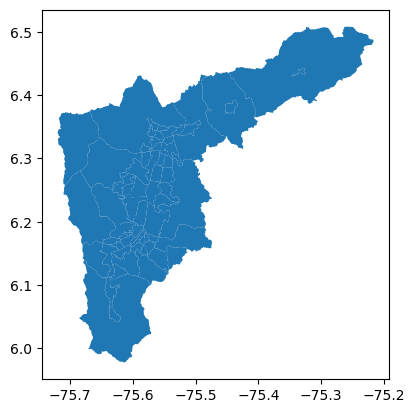

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Reading the shapefile
gdf = gpd.read_file(DATA_FOLDER + "comunas_boundaries/MACROZONAS.shp")

# Plotting the shapefile
gdf.plot()
plt.show()

In [28]:
# Convert to GeoJSON
gdf.to_file(DATA_FOLDER + "MACROZONAS.geojson", driver='GeoJSON')

In [29]:
import geopandas as gpd

# Load GeoJSON using geopandas
geojson = gpd.read_file(DATA_FOLDER + "MACROZONAS.geojson")

# Print the GeoDataFrame
print(geojson)

      MUNICIPIO  MACROZONA                                           geometry
0        ITAGUI        1.0  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...
1        ITAGUI        2.0  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...
2   La Estrella       25.0  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...
3         Bello        6.0  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...
4         Bello        5.0  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...
..          ...        ...                                                ...
61    Girardota       41.0  POLYGON ((-75.44804 6.43546, -75.44801 6.43539...
62    Girardota       27.0  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...
63     Medellin       47.0  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...
64     Medellin       31.0  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...
65       ITAGUI        4.0  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...

[66 rows x 3 columns]


In [30]:
geojson.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   MUNICIPIO  66 non-null     object  
 1   MACROZONA  66 non-null     float64 
 2   geometry   66 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 1.7+ KB


In [31]:
geojson

MUNICIPIO  MACROZONA                                           geometry
0        ITAGUI        1.0  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...
1        ITAGUI        2.0  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...
2   La Estrella       25.0  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...
3         Bello        6.0  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...
4         Bello        5.0  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...
..          ...        ...                                                ...
61    Girardota       41.0  POLYGON ((-75.44804 6.43546, -75.44801 6.43539...
62    Girardota       27.0  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...
63     Medellin       47.0  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...
64     Medellin       31.0  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...
65       ITAGUI        4.0  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...

[66 rows x 3 columns]

In [32]:
df_population_polygon = df_total.merge(geojson, left_on=['Macrozona _shapefile'], right_on=['MACROZONA'])

In [33]:
df_population_polygon_pop=df_population_polygon[['MACROZONA','population','geometry']]

In [34]:
df_population_polygon_pop

MACROZONA  population                                           geometry
0         1.0       13458  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...
1         2.0       12853  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...
2        25.0       23758  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...
3         6.0       19296  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...
4         5.0       22363  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...
..        ...         ...                                                ...
63       20.0       75905  POLYGON ((-75.54281 6.26130, -75.54281 6.26130...
64       27.0        5052  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...
65       47.0      218422  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...
66       31.0       47820  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...
67        4.0       36373  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...

[68 rows x 3 columns]

In [35]:
df_population_polygon_pop=df_population_polygon_pop.rename(columns={'MACROZONA': 'tile_id'})

In [36]:
df_population_polygon_pop

tile_id  population                                           geometry
0       1.0       13458  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...
1       2.0       12853  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...
2      25.0       23758  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...
3       6.0       19296  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...
4       5.0       22363  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...
..      ...         ...                                                ...
63     20.0       75905  POLYGON ((-75.54281 6.26130, -75.54281 6.26130...
64     27.0        5052  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...
65     47.0      218422  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...
66     31.0       47820  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...
67      4.0       36373  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...

[68 rows x 3 columns]

In [37]:
df_population_polygon_pop['tile_id'] = df_population_polygon_pop['tile_id'].astype(int)

In [38]:
df_population_polygon_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tile_id     68 non-null     int64   
 1   population  68 non-null     int64   
 2   geometry    68 non-null     geometry
dtypes: geometry(1), int64(2)
memory usage: 2.1 KB


In [39]:
comunas_commutes_final=comunas_commutes.rename(columns={'src': 'origin','dst': 'destination','weight': 'flow'})

In [40]:
comunas_commutes_final

origin  destination  flow
0          1            1   271
1          2            1    40
2          3            1    56
3          4            1    42
4          7            1    45
...      ...          ...   ...
3342      55           66     2
3343      56           66     1
3344      59           66     2
3345      64           66    10
3346      66           66    60

[3347 rows x 3 columns]

In [41]:
comunas_commutes_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3347 entries, 0 to 3346
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   origin       3347 non-null   int64
 1   destination  3347 non-null   int64
 2   flow         3347 non-null   int64
dtypes: int64(3)
memory usage: 78.6 KB


In [42]:
# comunas_commutes_final.to_csv('comunas_commutes_final.csv', index=False)

In [43]:
df_population_polygon_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tile_id     68 non-null     int64   
 1   population  68 non-null     int64   
 2   geometry    68 non-null     geometry
dtypes: geometry(1), int64(2)
memory usage: 2.1 KB


In [44]:
gpdf_population_polygon_pop = gpd.GeoDataFrame(df_population_polygon_pop, geometry='geometry')

In [45]:
gpdf_population_polygon_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tile_id     68 non-null     int64   
 1   population  68 non-null     int64   
 2   geometry    68 non-null     geometry
dtypes: geometry(1), int64(2)
memory usage: 2.1 KB


In [46]:
gpdf_population_polygon_pop

tile_id  population                                           geometry
0         1       13458  POLYGON ((-75.61279 6.18084, -75.61243 6.18052...
1         2       12853  POLYGON ((-75.61284 6.18427, -75.61274 6.18419...
2        25       23758  POLYGON ((-75.64759 6.16577, -75.64759 6.16572...
3         6       19296  POLYGON ((-75.57469 6.36276, -75.57469 6.36271...
4         5       22363  POLYGON ((-75.56883 6.35035, -75.56894 6.35034...
..      ...         ...                                                ...
63       20       75905  POLYGON ((-75.54281 6.26130, -75.54281 6.26130...
64       27        5052  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...
65       47      218422  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...
66       31       47820  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...
67        4       36373  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...

[68 rows x 3 columns]

In [47]:
gpdf_population_polygon_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   tile_id     68 non-null     int64   
 1   population  68 non-null     int64   
 2   geometry    68 non-null     geometry
dtypes: geometry(1), int64(2)
memory usage: 2.1 KB


In [48]:
url="comunas_commutes_final.csv"
tessellation=gpdf_population_polygon_pop
# fdf = skmob.FlowDataFrame.from_file(url, tessellation=tessellation, tile_id='tile_id')
# fdf.head()

In [49]:
flow_df = pd.read_csv(url)  # Assuming origin and destination columns are named 'origin' and 'destination'

missing_origins = set(flow_df['origin']).difference(tessellation['tile_id'])
missing_destinations = set(flow_df['destination']).difference(tessellation['tile_id'])

print("Missing origin IDs: ", missing_origins)
print("Missing destination IDs: ", missing_destinations)

Missing origin IDs:  {43}
Missing destination IDs:  {43}


In [50]:
# Assuming origin and destination columns in flow_df are named 'origin' and 'destination'

valid_ids = set(gpdf_population_polygon_pop['tile_id'])

# Filter rows where both origin and destination IDs are in valid_ids
filtered_flow_df = flow_df[flow_df['origin'].isin(valid_ids) & flow_df['destination'].isin(valid_ids)]

In [51]:
filtered_flow_df

origin  destination  flow
0          1            1   271
1          2            1    40
2          3            1    56
3          4            1    42
4          7            1    45
...      ...          ...   ...
3342      55           66     2
3343      56           66     1
3344      59           66     2
3345      64           66    10
3346      66           66    60

[3278 rows x 3 columns]

In [52]:
filtered_flow_df.to_csv('comunas_commutes_final_1.csv', index=False)

In [53]:
url="comunas_commutes_final_1.csv"
tessellation=gpdf_population_polygon_pop
fdf = skmob.FlowDataFrame.from_file(url, tessellation=tessellation, tile_id='tile_id')
fdf.head()

origin destination  flow
0      1           1   271
1      2           1    40
2      3           1    56
3      4           1    42
4      7           1    45

In [54]:
m = fdf.plot_flows(flow_color='red')
m

In [55]:
df_page_rank_table=pd.read_csv("page_rank_table.csv")

In [56]:
df_page_rank_table

node_id  community_id  pagerank  name
0        18             0  0.109520    19
1        11             2  0.060426    12
2        20             0  0.038912    21
3        10             0  0.030616    11
4        15             0  0.027422    16
..      ...           ...       ...   ...
61       62             2  0.005621    63
62       64             1  0.005394    65
63       39             3  0.005343    40
64       47             1  0.004998    48
65       43             0  0.003915    44

[66 rows x 4 columns]

In [57]:
df_population_polygon

comuna name  comuna_index  \
0       Itagui-Comuna 06                        '              1   
1        Itagui-Comuna 05                        '             2   
2       Urbana La Estrella                      '              3   
3        Bello-Comuna 06                         '             4   
4        Bello-Comuna 05                         '             5   
..                                             ...           ...   
63       Villa Hermosa                           '            61   
64       Urbana Girardota                        '            63   
65      Corregimiento Santa Elena               '             64   
66       Popular                                 '            65   
67       Itagui-Comuna 03                        '            66   

     municipality  muni_index  comuna longitude  comuna latitude  \
0        'Itagui'           8         -75.61493         6.176629   
1        'Itagui'           8         -75.60698         6.180733   
2   'La Estrella'           9         -75.63781         6.142994   
3         'Bello'           3         -75.56693         6.352998   
4         'Bello'           3         -75.56992         6.341258   
..            ...         ...               ...              ...   
63     'Medellin'           1         -75.54412         6.247540   
64    'Girardota'           7         -75.44330         6.380888   
65     'Medellin'           1         -75.51665         6.234823   
66     'Medellin'           1         -75.54420         6.293636   
67       'Itagui'           8         -75.63346         6.169564   

    Macrozona _shapefile  num_firms  population    MUNICIPIO  MACROZONA  \
0                      1        494       13458       ITAGUI        1.0   
1                      2        949       12853       ITAGUI        2.0   
2                     25       1946       23758  La Estrella       25.0   
3                      6        733       19296        Bello        6.0   
4                      5       1459       22363        Bello        5.0   
..                   ...        ...         ...          ...        ...   
63                    20       3284       75905     Medellin       20.0   
64                    27        992        5052    Girardota       27.0   
65                    47         37      218422     Medellin       47.0   
66                    31        685       47820     Medellin       31.0   
67                     4       1661       36373       ITAGUI        4.0   

                                             geometry  
0   POLYGON ((-75.61279 6.18084, -75.61243 6.18052...  
1   POLYGON ((-75.61284 6.18427, -75.61274 6.18419...  
2   POLYGON ((-75.64759 6.16577, -75.64759 6.16572...  
3   POLYGON ((-75.57469 6.36276, -75.57469 6.36271...  
4   POLYGON ((-75.56883 6.35035, -75.56894 6.35034...  
..                                                ...  
63  POLYGON ((-75.54281 6.26130, -75.54281 6.26130...  
64  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...  
65  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...  
66  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...  
67  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...  

[68 rows x 12 columns]

In [65]:
df_pagerank_polygon = df_population_polygon.merge(df_page_rank_table, left_on=['comuna_index'], right_on=['name'])

In [66]:
df_pagerank_polygon

comuna name  comuna_index  \
0       Itagui-Comuna 06                        '              1   
1        Itagui-Comuna 05                        '             2   
2       Urbana La Estrella                      '              3   
3        Bello-Comuna 06                         '             4   
4        Bello-Comuna 05                         '             5   
..                                             ...           ...   
63       Villa Hermosa                           '            61   
64       Urbana Girardota                        '            63   
65      Corregimiento Santa Elena               '             64   
66       Popular                                 '            65   
67       Itagui-Comuna 03                        '            66   

     municipality  muni_index  comuna longitude  comuna latitude  \
0        'Itagui'           8         -75.61493         6.176629   
1        'Itagui'           8         -75.60698         6.180733   
2   'La Estrella'           9         -75.63781         6.142994   
3         'Bello'           3         -75.56693         6.352998   
4         'Bello'           3         -75.56992         6.341258   
..            ...         ...               ...              ...   
63     'Medellin'           1         -75.54412         6.247540   
64    'Girardota'           7         -75.44330         6.380888   
65     'Medellin'           1         -75.51665         6.234823   
66     'Medellin'           1         -75.54420         6.293636   
67       'Itagui'           8         -75.63346         6.169564   

    Macrozona _shapefile  num_firms  population    MUNICIPIO  MACROZONA  \
0                      1        494       13458       ITAGUI        1.0   
1                      2        949       12853       ITAGUI        2.0   
2                     25       1946       23758  La Estrella       25.0   
3                      6        733       19296        Bello        6.0   
4                      5       1459       22363        Bello        5.0   
..                   ...        ...         ...          ...        ...   
63                    20       3284       75905     Medellin       20.0   
64                    27        992        5052    Girardota       27.0   
65                    47         37      218422     Medellin       47.0   
66                    31        685       47820     Medellin       31.0   
67                     4       1661       36373       ITAGUI        4.0   

                                             geometry  node_id  community_id  \
0   POLYGON ((-75.61279 6.18084, -75.61243 6.18052...        0             1   
1   POLYGON ((-75.61284 6.18427, -75.61274 6.18419...        1             1   
2   POLYGON ((-75.64759 6.16577, -75.64759 6.16572...        2             1   
3   POLYGON ((-75.57469 6.36276, -75.57469 6.36271...        3             1   
4   POLYGON ((-75.56883 6.35035, -75.56894 6.35034...        4             3   
..                                                ...      ...           ...   
63  POLYGON ((-75.54281 6.26130, -75.54281 6.26130...       60             2   
64  POLYGON ((-75.43592 6.39105, -75.43571 6.39031...       62             2   
65  POLYGON ((-75.52505 6.28801, -75.52498 6.28802...       63             1   
66  POLYGON ((-75.54807 6.30441, -75.54803 6.30440...       64             1   
67  POLYGON ((-75.62936 6.17528, -75.62875 6.17515...       65             1   

    pagerank  name  
0   0.014910     1  
1   0.007009     2  
2   0.020164     3  
3   0.012656     4  
4   0.008849     5  
..       ...   ...  
63  0.007119    61  
64  0.005621    63  
65  0.017156    64  
66  0.005394    65  
67  0.006807    66  

[68 rows x 16 columns]

In [69]:
df_pagerank_polygon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   comuna name           68 non-null     object  
 1   comuna_index          68 non-null     int64   
 2   municipality          68 non-null     object  
 3   muni_index            68 non-null     int64   
 4   comuna longitude      68 non-null     float64 
 5   comuna latitude       68 non-null     float64 
 6   Macrozona _shapefile  68 non-null     int64   
 7   num_firms             68 non-null     int64   
 8   population            68 non-null     int64   
 9   MUNICIPIO             68 non-null     object  
 10  MACROZONA             68 non-null     float64 
 11  geometry              68 non-null     geometry
 12  node_id               68 non-null     int64   
 13  community_id          68 non-null     int64   
 14  pagerank              68 non-null     float64 
 15  name    

In [70]:
# Assuming 'geometry' column in df_pagerank_polygon contains WKT geometry
gdf = gpd.GeoDataFrame(df_pagerank_polygon, geometry='geometry')

/tmp/ipykernel_2299491/1315505803.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['comuna_index']):
/tmp/ipykernel_2299491/1315505803.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['comuna_index']):


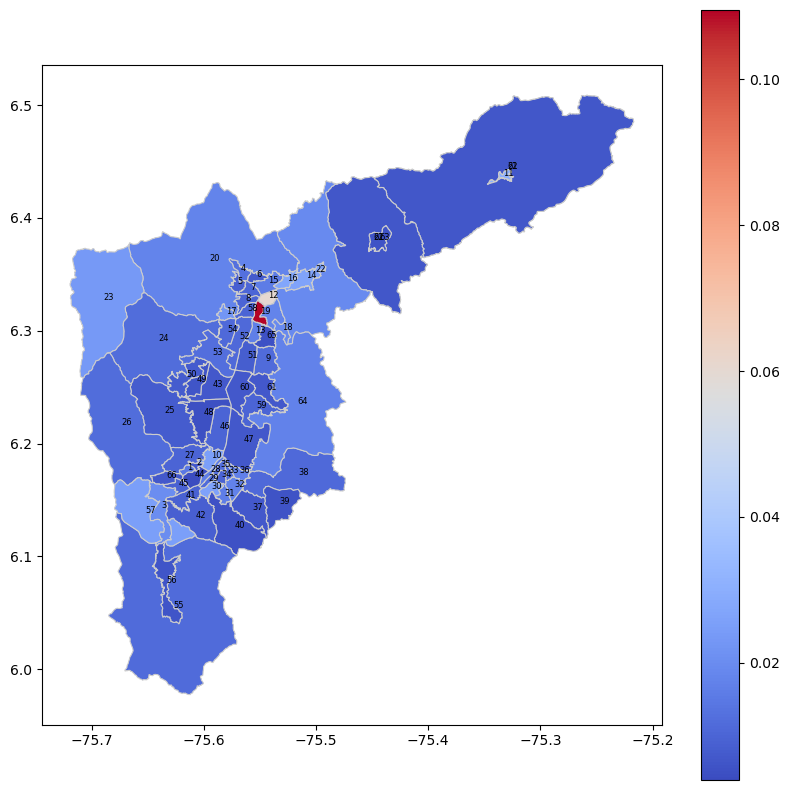

In [85]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming `gdf` is your GeoDataFrame
# gdf = gpd.read_file("your_file.geojson")  # Replace "your_file.geojson" with your actual file

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot with color determined by the 'pagerank' column
plot = gdf.plot(column='pagerank', cmap='coolwarm', linewidth=0.8, edgecolor='0.8', ax=ax, legend=True)

# Annotate each polygon with the comuna_index at its centroid
for x, y, label in zip(gdf.geometry.centroid.x, gdf.geometry.centroid.y, gdf['comuna_index']):
    ax.text(x, y, str(label), fontsize=6)

# Save the plot as a JPEG file
plt.savefig("plot_pagerank_in_map.jpg", dpi=300, format='jpeg')

# Show the plot
plt.show()

In [58]:
# fdf2 = skmob.FlowDataFrame.from_file("page_rank_table.csv",
#                                         tessellation=gpdf_population_polygon_pop,
#                                         tile_id='tile_id',
#                                         sep=",")
# m = fdf2.plot_tessellation(popup_features=['tile_id', 'pagerank'])
# m

In [59]:
# 

In [60]:
# comunas_commutes

In [61]:
# import skmob
# import geopandas as gpd
# # load a spatial tessellation
# url = "https://raw.githubusercontent.com/scikit-mobility/tutorials/master/mda_masterbd2020/data/NY_counties_2011.geojson"
# tessellation = gpd.read_file(
#     url) # load a tessellation
# tessellation.head()

In [62]:

# # tessellation = gpd.read_file(url_tess).rename(columns={'tile_id': 'tile_ID'})
# # load real flows into a FlowDataFrame
# # download the file with the real fluxes from: https://raw.githubusercontent.com/scikit-mobility/scikit-mobility/master/tutorial/data/NY_commuting_flows_2011.csv
# url = "https://github.com/scikit-mobility/tutorials/raw/master/mda_masterbd2020/data/NY_commuting_flows_2011.csv"
# # create a FlowDataFrame from a file and a tessellation
# fdf = skmob.FlowDataFrame.from_file(url, tessellation=tessellation, tile_id='tile_id')
# fdf.head()

In [78]:
df_page_rank_table_new=df_page_rank_table.rename(columns={'name': 'comuna_index'})

In [79]:
df_page_rank_table_new

node_id  community_id  pagerank  comuna_index
0        18             0  0.109520            19
1        11             2  0.060426            12
2        20             0  0.038912            21
3        10             0  0.030616            11
4        15             0  0.027422            16
..      ...           ...       ...           ...
61       62             2  0.005621            63
62       64             1  0.005394            65
63       39             3  0.005343            40
64       47             1  0.004998            48
65       43             0  0.003915            44

[66 rows x 4 columns]

In [80]:
df_page_rank_table_new.to_csv('page_rank_table.csv',index=False)